In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd

In [6]:
X, y = make_blobs(n_samples=1000, n_features=2, center_box=(-2,2),centers=2, random_state=2)

In [8]:
np.unique(y, return_counts=True)

(array([0, 1]), array([500, 500]))

In [3]:
print (X.shape, y.shape)

(1000, 2) (1000,)


In [4]:
q_point = np.array([-1.0,-3.0])

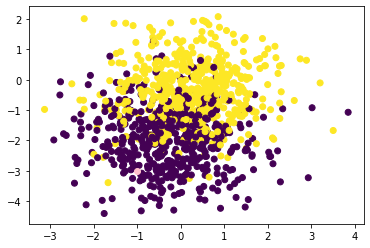

In [5]:
plt.scatter(X[:,0], X[:,1],c=y)
plt.scatter(q_point[0], q_point[1], c='pink')
plt.show()

In [6]:
arr = [1,2,1,1,4,5]
np.unique(arr, return_counts=True)

(array([1, 2, 4, 5]), array([3, 1, 1, 1]))

In [7]:
def distance(a,b):
    return np.sqrt((np.sum((a-b)**2)))

In [13]:
def KNN(X,y,q_point,k=5):
    
    m = X.shape[0]
    
    dis_l = []
    
    for ix in range(m):
        dis = distance(X[ix],q_point)
        
        dis_l.append([dis,y[ix]])
        
    dis_l = sorted(dis_l)
    dis_l = np.array(dis_l)[:k]
    
    uniq = np.unique(dis_l[:,1], return_counts=True)
    out = np.argmax(uniq[1])
        
    return int(uniq[0][out])

In [16]:
KNN(X,y,q_point)

0

In [25]:
def accuracy(X_train, y_train, X_val, y_val, k=5):
    y_pred = []
    for ix in X_val:
        
        pred = KNN(X_train,y_train,ix,k)
        y_pred.append(pred)
    score = np.sum(y_val==y_pred)/y_val.shape[0]
    return score

In [27]:
data = pd.read_csv("./fashion-mnist_test.csv")

X = data.values[:,1:]
y = data.values[:,0]

In [28]:
split = int(0.80*(X.shape[0]))

In [29]:
X_train = X[:split]
y_train = y[:split]

X_val = X[split:]
y_val = y[split:]

In [30]:
accuracy(X_train,y_train,X_val,y_val)

2000


0.8275